In [3]:
import os
os.chdir("..")

In [4]:
from echopop import Survey
import echopop.graphics.plotting as egp

In [5]:
init_config = "C:/Users/Brandyn Lucca/Documents/GitHub/echopop/config_files/initialization_config.yml"
file_config = "C:/Users/Brandyn Lucca/Documents/GitHub/echopop/config_files/survey_year_2019_config.yml"
survey = Survey(init_config, file_config)
survey.load_survey_data()
survey.load_acoustic_data()
survey.transect_analysis()
survey.fit_variogram()
survey.kriging_analysis(variogram_parameters={"n_lags": 30}, variable="biomass_density")

--------------------------------
TRANSECT RESULTS
--------------------------------
| Variable: Biomass (kmt)
| Age-1 fish excluded: True
| Stratum definition: KS
--------------------------------
GENERAL RESULTS
--------------------------------
| Total biomass: 1651.1 kmt
    Age-1: 7.9 kmt
    Age-2+: 1643.2 kmt
| Total female biomass: 832.2 kmt
    Age-1: 4.0 kmt
    Age-2+: 828.2 kmt
| Total male biomass: 818.5 kmt
    Age-1: 3.9 kmt
    Age-2+: 814.6 kmt
| Total unsexed biomass: 0.4 kmt
| Total mixed biomass: 36.8 kmt
--------------------------------
Longitude and latitude coordinates (WGS84) converted to standardized coordinates (x and y).
-----------------------------
VARIOGRAM OPTIMIZATION
-----------------------------
| See `self.analysis['settings']['variogram']['optimization'] for parameter settings.
-----------------------------
| Variogram model: ['bessel', 'exponential'] (composite family)
-----------------------------
| Initial fit -> Optimized fit
------------------------

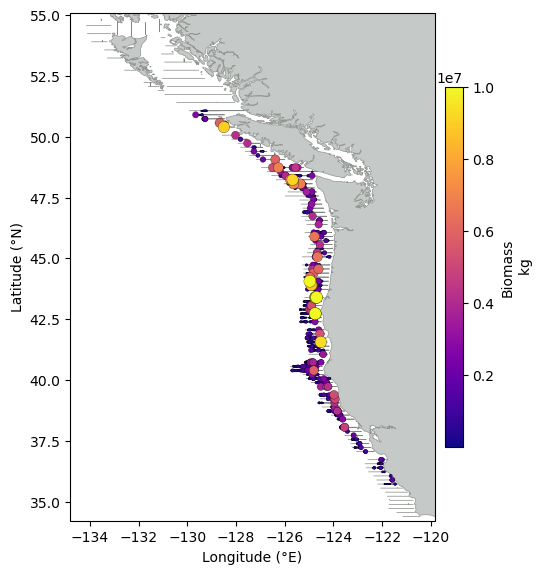

In [6]:
survey.plot(kind="transect", variable="biomass")

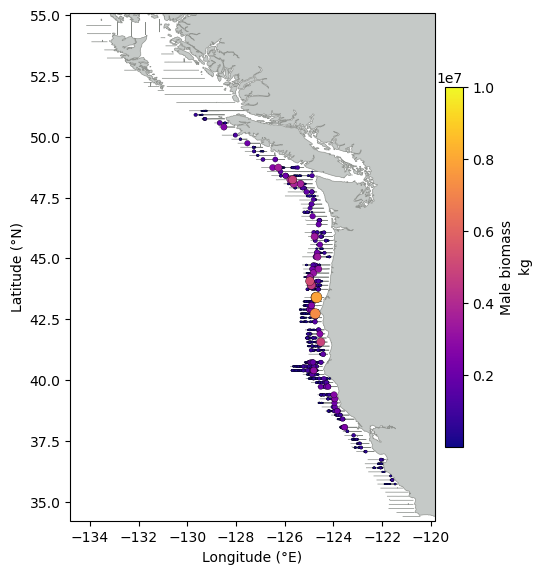

In [7]:
survey.plot(kind="transect", variable="biomass_male")

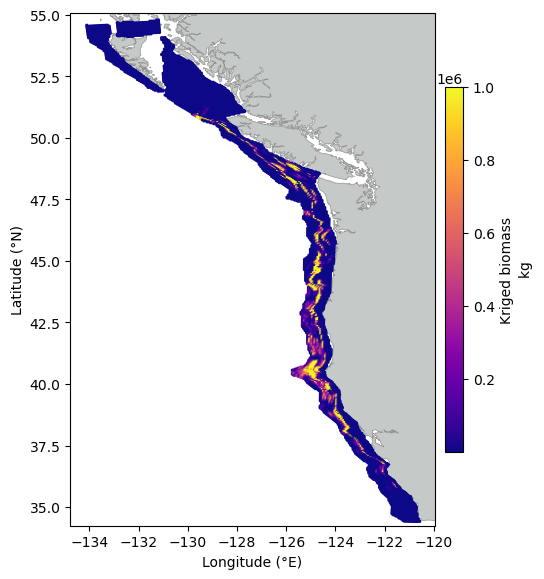

In [8]:
survey.plot(kind="mesh", variable="biomass")

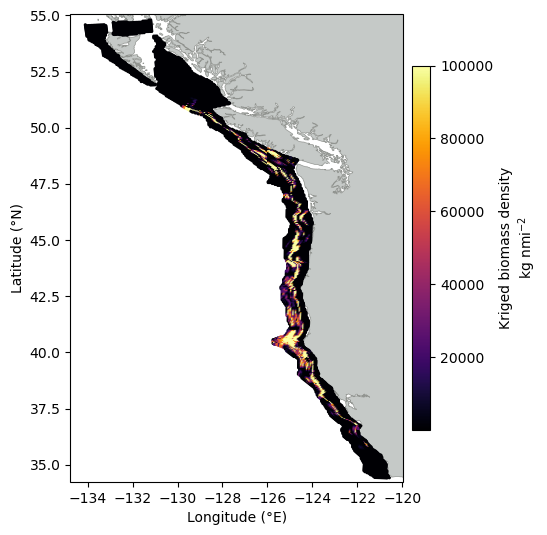

In [9]:
survey.plot(kind="mesh", variable="kriged_mean")

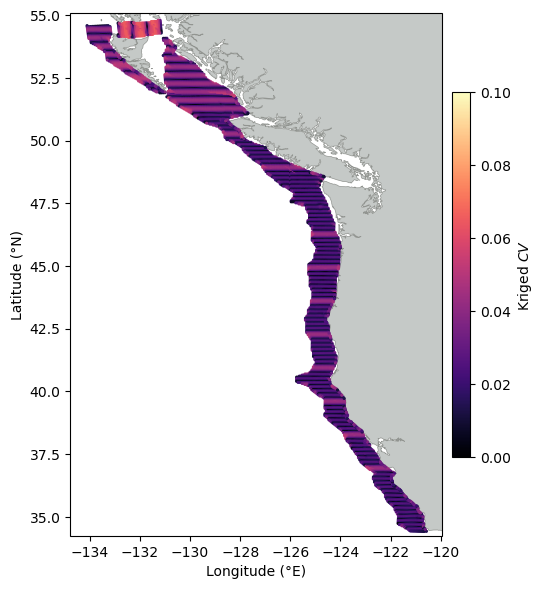

In [10]:
survey.plot(kind="mesh", variable="sample_cv")

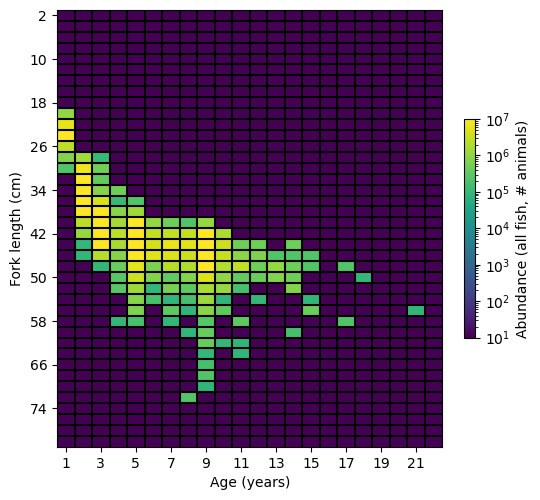

In [27]:
survey.plot(kind="age_length_distribution", variable="abundance", data_range=(1e1, 1e7), log_base=10)

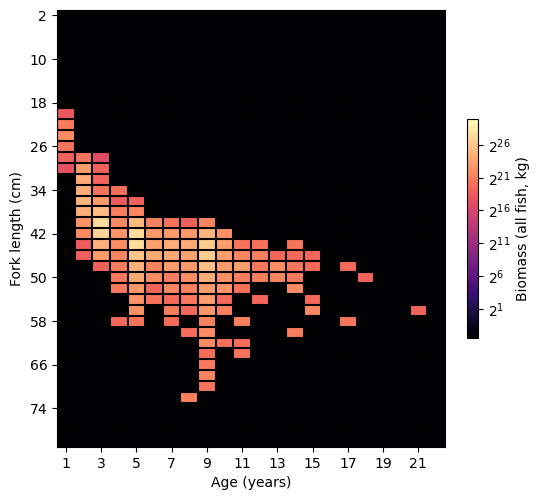

In [33]:
survey.plot(kind="age_length_distribution", variable="biomass", colormap="magma", data_range=(0, 10e8), log_base=2)